## Length EDA

As result of some interesting findings in `capitalisation_eda.ipynb`, I decided to take a short look at the lengths of the texts.

### Summary
1. Despite there being 14316 unique texts, there are only 130 unique dataset labels (of which many are still very similar).
1. 95.4% has a their number of words between 0 and 20'000, and 99.2% below 70'000. The other 0.8% lies in a tail that exteds up to 1'790'898 words.
1. The biggest file is very big (10.8 mb of text).
    
In other words, we have a few very long entries (likely books) that are a very small part of the dataset. It might be worth to exclude these as they might have different characteristics from the papers and might take up a lot of training time.

In [1]:
import os, sys, inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

from utils import ParseUtils
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import pandas as pd

font = {'size': 12}
matplotlib.rc('font', **font)

In [2]:
DATA_PATH = "D:\Kynntec\Git_repositories\show-us-the-data\data\coleridgeinitiative-show-us-the-data/"

In [3]:
train_df = pd.read_csv(DATA_PATH + "train.csv")

In [4]:
train_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [5]:
print("Total amount of texts:", len(np.unique(train_df['Id'])))
print("Amount of unique labels:", len(np.unique(train_df['cleaned_label'])))

Total amount of texts: 14316
Amount of unique labels: 130


In [6]:
np.unique(train_df['cleaned_label'])

array(['2019 ncov complete genome sequences', '2019 ncov genome sequence',
       '2019 ncov genome sequences', 'adni',
       'advanced national seismic system anss comprehensive catalog comcat ',
       'advanced national seismic system comprehensive catalog',
       'aging integrated database', 'aging integrated database agid ',
       'agricultural resource management survey',
       'agricultural resources management survey',
       'alzheimer s disease neuroimaging initiative adni ',
       'alzheimers disease neuroimaging initiative',
       'anss comprehensive catalog',
       'anss comprehensive earthquake catalog',
       'arms farm financial and crop production practices',
       'baccalaureate and beyond',
       'baccalaureate and beyond longitudinal study',
       'baltimore longitudinal study of aging',
       'baltimore longitudinal study of aging blsa ',
       'beginning postsecondary student',
       'beginning postsecondary students',
       'beginning postsecondary

In [7]:
train_df['text'] = train_df['Id'].apply(lambda ID: ParseUtils.read_append_return(ID, DATA_PATH+"train/"))

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def count_words(text):
    return len(tokenizer.tokenize(text))

In [9]:
train_df['text_word_count'] = train_df['text'].apply(count_words)

In [10]:
def count_statistics(data, title, bins):
    plt.hist(data, bins, color='#107070')
    plt.title(title)
    print("--"+title+"--")
    print("Mean", np.mean(data))
    print("Median", np.median(data))
    print("Std", np.std(data))

--Word count in texts--
Mean 8740.314582167743
Median 5269.0
Std 28737.03087640476


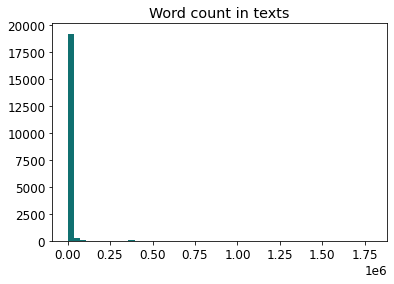

In [11]:
count_statistics(train_df['text_word_count'], "Word count in texts", bins=50)

--Word count in texts--
Mean 8462.811285234558
Median 5268.5
Std 23351.542286569547


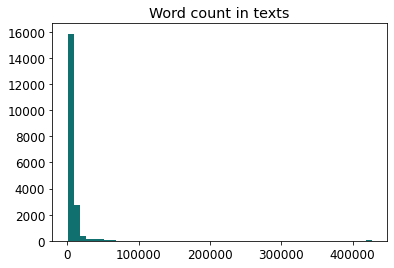

In [12]:
count_statistics(train_df['text_word_count'][train_df['text_word_count'] < 500000], "Word count in texts", bins=50)

--Word count in texts--
Mean 6826.893897435897
Median 5243.0
Std 6697.829555806842


Text(0, 0.5, 'Text count')

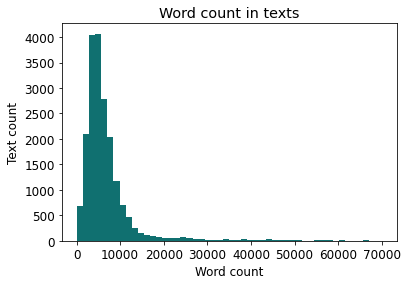

In [34]:
count_statistics(train_df['text_word_count'][train_df['text_word_count'] < 70000], "Word count in texts", bins=50)
plt.xlabel("Word count")
plt.ylabel("Text count")
# plt.savefig('lengths.pdf', bbox_inches="tight")

In [14]:
len(train_df['text_word_count'][train_df['text_word_count'] < 20000])/len(train_df)

0.9541732363562382

In [15]:
len(train_df['text_word_count'][train_df['text_word_count'] < 70000])/len(train_df)

0.9918111998372412

In [16]:
max(train_df['text_word_count'])

1790897

In [17]:
subject = train_df.loc[train_df['text_word_count'] == max(train_df['text_word_count'])]
subject

,Id,pub_title,dataset_title,dataset_label,cleaned_label,text,text_word_count
15752,c12a3ad2-17bc-4b8b-8779-77ba2680ae96,2013 Annual Meeting Abstract Supplement,Rural-Urban Continuum Codes,Rural-Urban Continuum Codes,rural urban continuum codes,AN OFFICIAL JOURNAL OF THE AMERICAN COLLEGE OF...,1790897


## Observations

1. 95.4% has a their number of words between 0 and 20'000, and 99.2% below 70'000. The other 0.8% lies in a tail that exteds up to 1'790'898 words.

2. The biggest file is very big (10.8 mb of text)

In [18]:
def count_characters(text):
    return len(text)

In [19]:
train_df['text_character_count'] = train_df['text'].apply(count_characters)

--Character count in texts--
Mean 55260.371954630995
Median 33320.0
Std 183300.17230720716


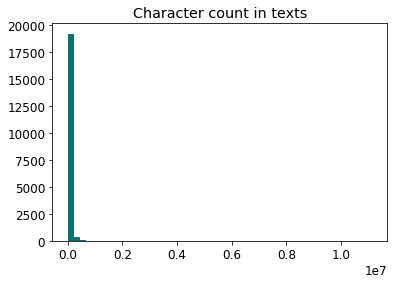

In [20]:
count_statistics(train_df['text_character_count'], "Character count in texts", bins=50)

--Character count in texts--
Mean 43473.56758557081
Median 33170.0
Std 43850.780260126536


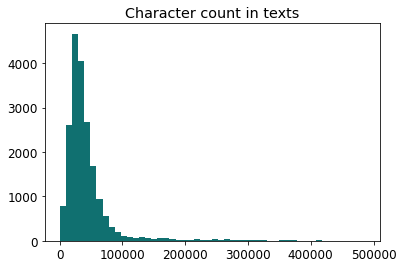

In [21]:
count_statistics(train_df['text_character_count'][train_df['text_character_count'] < 500000], "Character count in texts", bins=50)

--Character count in texts--
Mean 38647.784407984116
Median 32755.0
Std 25921.221902249457


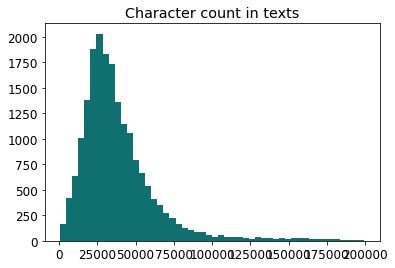

In [22]:
count_statistics(train_df['text_character_count'][train_df['text_character_count'] < 200000], "Character count in texts", bins=50)

In [23]:
len(train_df['text_character_count'][train_df['text_character_count'] < 200000])/len(train_df)

0.973399114999237

In [24]:
len(train_df['text_character_count'][train_df['text_character_count'] < 100000])/len(train_df)

0.9424240882966278

In [25]:
max(train_df['text_character_count'][train_df['text_character_count'] < 200000])

199575

In [26]:
subject = train_df.loc[train_df['text_character_count'] == max(train_df['text_character_count'][train_df['text_character_count'] < 200000])]
subject

,Id,pub_title,dataset_title,dataset_label,cleaned_label,text,text_word_count,text_character_count
15541,6b0d9465-695f-4ae5-af51-f7c4478aaba6,University Researchers' Perceptions and Experi...,Higher Education Research and Development Survey,Higher Education Research and Development Survey,higher education research and development survey,examines possible contributing factors and ten...,33920,199575
